## Isochrone Node
Wat is een [isochrone](https://en.wiktionary.org/wiki/isochrone)?

1 -> 1

Documentatie Open Route Service Isochrones: https://openrouteservice.org/documentation/#/reference/isochrones
Documentatie Open Route Service Python: http://openrouteservice-py.readthedocs.io/en/latest/

In [52]:
# Read from input/output table
import pandas as pd
input_table = pd.read_csv('io_table.csv')

In [55]:
# PARAMETERS
# Driving time (by car) in minutes
driving_time = 10

# ISOCHRONE
import pandas as pd
from shapely.geometry import shape
import openrouteservice
from openrouteservice.isochrones import isochrones
from header import gdf_to_df, df_to_gdf

# Initialize ORS with my personal API key (free token). For production please replace it
client = openrouteservice.Client(key='58d904a497c67e00015b45fc45f368a7463145e7be57c7563a900810')

# Request isochrone for a Point
# How to use **kwargs: http://book.pythontips.com/en/latest/args_and_kwargs.html#usage-of-kwargs
def calculate_isochrone(Point, **kwargs):
    # First extract (X,Y) from the Point
    XY = (Point.x, Point.y)
    # Then request the isochrone
    isochrone = isochrones(client, locations=XY, **kwargs)
    # The returned JSON is always a FeatureCollection of 1 Feature with a geometry (= GeoJSON)
    return shape(isochrone['features'][0]['geometry'])

# Advanced parameters. Don't change these if you don't know what you are doing.
# See: https://openrouteservice.org/dev/#/api-docs/isochrones/get
params = {'intervals': [60 * driving_time], # is `range` in general API documentation
          'segments': [], # is `interval` in general API documentation
          'range_type': 'time',
          'profile': 'driving-car'
         }

# Read input
gdf = df_to_gdf(input_table)

# Request isochrones. This overwrites the current geometry(!)
gdf.geometry = gdf.geometry.apply(lambda P: calculate_isochrone(P, **params))

# Output
output_table = gdf_to_df(gdf)

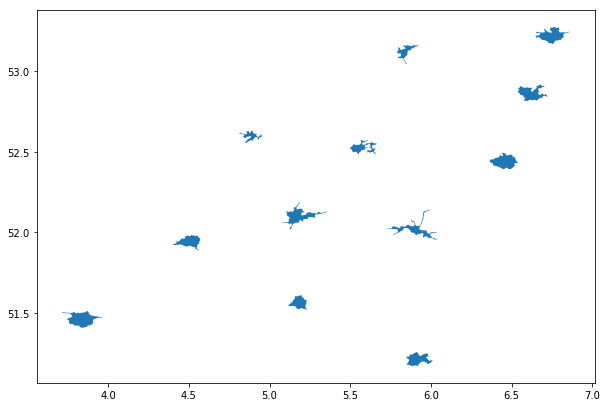

In [57]:
# Write to input/output table
output_table.to_csv('io_table.csv', index=False)

# Show please
%matplotlib inline
gdf.plot(figsize=(10,10));